In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Dictionary


### Metadata Columns

| Column    | Description                                         |
|-----------|-----------------------------------------------------|
| **GVKEY** | Unique company identifier in Compustat              |
| **fyear** | Fiscal year of the data                             |
| **tic**   | Stock ticker symbol                                 |
| **conm**  | Company name                                        |
| **dlrsn** | Delisting reason (Compustat code; **1** = bankruptcy) |
| **ggroup**| GICS industry group code                            |

### Financial Metrics Columns

| Ratio                      | Full Name                                    | Formula                                                                                               |
|----------------------------|----------------------------------------------|-------------------------------------------------------------------------------------------------------|
| **working_capital_ratio**             | Working Capital Ratio           | Current Assets ÷ Current Liabilities                                           |
| **roe**                    | Return on Equity                             | Net Income ÷ Common Equity                                                                            |
| **roa**                    | Return on Assets                             | Net Income ÷ Total Assets                                                                             |
| **gross_profit_margin**    | Gross Profit Margin                          | (Revenue − Cost of Goods Sold) ÷ Revenue                                                              |
| **re_to_assets**           | Retained Earnings to Assets                  | Retained Earnings ÷ Total Assets                                                                      |
| **ebit_to_assets**         | EBIT to Assets                               | Earnings Before Interest and Taxes ÷ Total Assets                                                     |
| **ebitda_to_assets**       | EBITDA to Assets                             | Earnings Before Interest, Taxes, Depreciation, and Amortization ÷ Total Assets                        |
| **debt_to_equity**         | Debt to Equity                               | Total Debt ÷ Common Equity                                                                            |
| **debt_to_assets**         | Debt to Assets                               | Total Debt ÷ Total Assets                                                                             |
| **interest_coverage**      | Interest Coverage Ratio                      | Earnings Before Interest and Taxes ÷ Interest Expense                                                 |
| **equity_ratio**           | Equity Ratio                                 | Common Equity ÷ Total Assets                                                                          |
| **receivables_turnover**   | Receivables Turnover                         | Revenue ÷ Accounts Receivable                                                                          |
| **payables_turnover_days** | Payables Turnover Days                       | 365 × Accounts Payable ÷ Cost of Goods Sold                                                           |
| **asset_turnover**         | Asset Turnover                               | Revenue ÷ Total Assets                                                                                 |
| **ocf_to_debt**            | Operating Cash Flow to Debt                  | Operating Activities Net Cash Flow ÷ Total Debt                                                       |
| **free_cf_to_assets**      | Free Cash Flow to Assets                     | (Operating Activities Net Cash Flow − Capital Expenditures) ÷ Total Assets                            |
| **cf_margin**              | Cash Flow Margin                             | Operating Activities Net Cash Flow ÷ Revenue                                                          |
| **working_capital_to_assets** | Working Capital to Assets                | (Current Assets − Current Liabilities) ÷ Total Assets                                                  |


# Import Data Files & Merge

In [ ]:
#https://drive.google.com/file/d/1iDO74uxW9EJv7JbCnlr34pBtezJFlCYF/view?usp=sharing
url = 'https://drive.google.com/uc?id=1iDO74uxW9EJv7JbCnlr34pBtezJFlCYF'
data = pd.read_csv(url)
data.head()

,GVKEY,fyear,tic,conm,dlrsn,ggroup,working_capital_ratio,roe,roa,gross_profit_margin,...,debt_to_assets,interest_coverage,equity_ratio,receivables_turnover,payables_turnover_days,asset_turnover,ocf_to_debt,free_cf_to_assets,cf_margin,working_capital_to_assets
0,2615,2013,CAMPQ,CALAMP CORP,1,4520.0,2.190061,0.088646,0.065841,0.346553,...,0.010365,50.254795,0.742738,6.392342,48.559325,1.315946,12.279871,0.115377,0.096718,0.279603
1,2615,2014,CAMPQ,CALAMP CORP,1,4520.0,2.710797,0.109046,0.081474,0.359928,...,0.003396,84.256757,0.747149,5.230002,54.638729,1.236846,41.635174,0.104670,0.114303,0.396887
2,2615,2015,CAMPQ,CALAMP CORP,1,4520.0,6.027782,0.089418,0.044073,0.379529,...,0.363719,4.340355,0.492886,5.678892,52.259011,0.730349,0.339056,0.112089,0.168852,0.648351
3,2615,2016,CAMPQ,CALAMP CORP,1,4520.0,2.655477,-0.048419,-0.019366,0.444597,...,0.359748,1.634499,0.399967,5.208997,56.650872,0.860251,0.175690,0.043696,0.073472,0.315736
4,2615,2017,CAMPQ,CALAMP CORP,1,4520.0,2.887971,0.083538,0.035132,0.434222,...,0.326218,1.497957,0.420547,5.111931,62.550272,0.773610,0.433535,0.123797,0.182814,0.381308


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   GVKEY                      10718 non-null  int64  
 1   fyear                      10718 non-null  int64  
 2   tic                        10718 non-null  object 
 3   conm                       10718 non-null  object 
 4   dlrsn                      10718 non-null  int64  
 5   ggroup                     10718 non-null  float64
 6   working_capital_ratio      10718 non-null  float64
 7   roe                        10718 non-null  float64
 8   roa                        10718 non-null  float64
 9   gross_profit_margin        10718 non-null  float64
 10  re_to_assets               10718 non-null  float64
 11  ebit_to_assets             10718 non-null  float64
 12  ebitda_to_assets           10718 non-null  float64
 13  debt_to_equity             10718 non-null  flo

# EDA

## Inspect values of prediction/forecast variable: Bankruptcy

In [ ]:
df = data.copy()  # create new copy to use for EDA and modeling

# inspect values of prediction/forecast bankrupcty
df['dlrsn'].value_counts()  # 7.18%

,count
dlrsn,
0,10000
1,718


## Identify Industries

In [ ]:
# calculate the number of companies per industry
company_count_by_industry = df['ggroup'].value_counts()

# calculate the number of bankruptcies by industry
bankrupt_count_by_industry = df.groupby('ggroup')['dlrsn'].apply(lambda x: (x == 1).sum()).sort_values(ascending=False)

# merge dataframes to compare bankruptcy count and number of companies
industry_comparison = pd.DataFrame({
    'company_count': company_count_by_industry,
    'bankrupt_count': bankrupt_count_by_industry
})

# sort by bankruptcy count and inspect the results
industry_comparison = industry_comparison.sort_values(by='bankrupt_count', ascending=False)

industry_comparison.head(10)



# these are the industries with the most companies/bankruptcies that can be used for the model
# did this to ensure industries selected had enough bankruptcy information


,company_count,bankrupt_count
ggroup,,
3520.0,1858,187
3510.0,871,98
1010.0,727,74
2550.0,484,63
4510.0,873,44
2010.0,1016,37
2530.0,467,36
3030.0,127,25
1510.0,746,23


We want to focus on industries with more companies and bankruptcies. Based on the information above, we will be investigating the following:

* 3520 - Pharmaceuticals, Biotechnology & Life Sciences

* 3510 - Health Care Equipment & Services

* 1010 - Energy

* 2550 - Consumer Discretionary Distribution & Retail

* 4510 - Software & Services

* 2010 - Capital Goods

* 2530 - Consumer Services

* 3030 - Household & Personal Products

* 1510 - Materials

* 4520 - Technology Hardware & Equipment

## Checking & Managing Multi-Colinearity

In [ ]:
# Variance Inflation Factor (VIF)
# quantifies how much the variance of a regression coefficient is inflated due to collinearity with other features
# high VIF suggests that the feature is highly correlated with others

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


ratios = ['working_capital_ratio', 'roe', 'roa', 'gross_profit_margin', 're_to_assets',
          'ebit_to_assets', 'ebitda_to_assets', 'debt_to_equity', 'debt_to_assets',
          'interest_coverage', 'equity_ratio', 'receivables_turnover', 'payables_turnover_days',
          'asset_turnover', 'ocf_to_debt', 'free_cf_to_assets', 'cf_margin', 'working_capital_to_assets']

# create new dataframe using relevant ratios
df_ratios = df[ratios]

# Assign df_ratios to X
X = df_ratios

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)

                      Feature         VIF
0       working_capital_ratio    1.298738
1                         roe    1.161526
2                         roa    4.859985
3         gross_profit_margin   13.532798
4                re_to_assets    1.724042
5              ebit_to_assets  342.174880
6            ebitda_to_assets  322.131671
7              debt_to_equity    1.133597
8              debt_to_assets    1.778476
9           interest_coverage    1.015332
10               equity_ratio    4.816408
11       receivables_turnover    1.006316
12     payables_turnover_days    1.046501
13             asset_turnover    1.630963
14                ocf_to_debt    1.006974
15          free_cf_to_assets    5.786543
16                  cf_margin   13.609502
17  working_capital_to_assets    4.958791


'gross_profit_margin', 'ebit_to_assets', 'ebitda_to_assets', and 'cf_margin' have the highest VIF scores. We need consider removing 2 of them (gross_profit_margin/cf_margin and ebit_to_assets/ebitda_to_assets).

There are still too many ratios for interpretation (and there might be a risk of overfitting), even if the multi-colinearity is low. Therefore, using intuition and deductive reasoning, the following ratios will be used as explanatory variables for the model:

* Working Capital Ratio

* Return on Assets

* EBIT to Assets Ratio

* Debt to Equity Ratio

* Interest Coverage Ratio

* Operating Cash Flow to Debt Ratio

* Receivables Turnover

* Payables Turnover Days

# Logit Models

## Industry-Specific Prediction

ChatGPT was used for assistance:

(1) https://chatgpt.com/share/680c52ec-6ca0-8007-b3a8-791a369b2b48

(2) https://chatgpt.com/share/680d7b09-7e30-8007-a7da-d6e6b790f684


=== Industry Code 3520 ===
Accuracy:      0.492
Confusion Matrix:
[[159 176]
 [ 13  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.47      0.63       335
           1       0.12      0.65      0.20        37

    accuracy                           0.49       372
   macro avg       0.52      0.56      0.41       372
weighted avg       0.84      0.49      0.58       372

ROC AUC:       0.596

=== Industry Code 3510 ===
Accuracy:      0.800
Confusion Matrix:
[[129  26]
 [  9  11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       155
           1       0.30      0.55      0.39        20

    accuracy                           0.80       175
   macro avg       0.62      0.69      0.63       175
weighted avg       0.86      0.80      0.82       175

ROC AUC:       0.809

=== Industry Code 1010 ===
Accuracy:      0.671
Confusion Matrix:
[[92 39]
 [

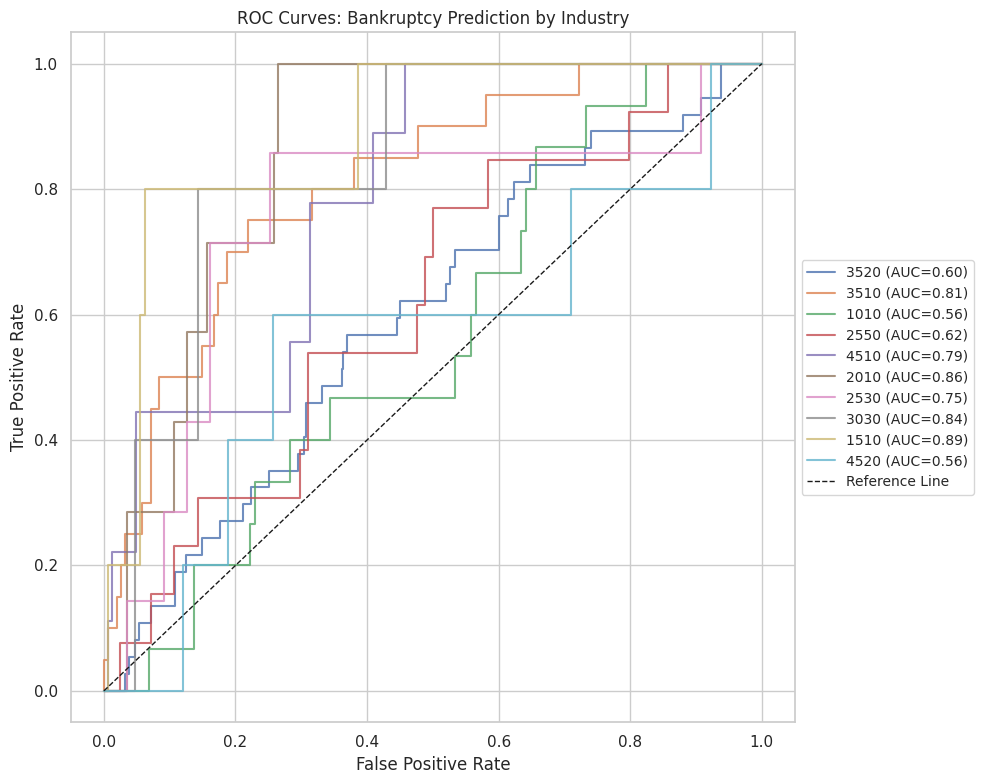

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
from sklearn.preprocessing import StandardScaler

# GICS industries identified in EDA
focus_codes = [3520, 3510, 1010, 2550, 4510,
               2010, 2530, 3030, 1510, 4520]

# financial ratios (explanatory variables)
features = [
    'working_capital_ratio', 'roa', 'ebit_to_assets', 'debt_to_equity',
    'interest_coverage', 'ocf_to_debt', 'receivables_turnover',
    'payables_turnover_days'
]

# create dummy variables for each industry (AKA industry-specific intercepts)
df_dummies = pd.get_dummies(df['ggroup'], prefix='industry', drop_first=True)

# add the dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# standardize features since some firms are big and some are small
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

plt.figure(figsize=(10, 8))

# loop through industries
for code in focus_codes:  # code refers to GICS code
    # df that subsets to specific industry in loop
    df_code = df[df['ggroup'] == code]

    y = (df_code['dlrsn'] == 1).astype(int)  # bankruptcy is target variable
    X = df_code[features + df_dummies.columns.tolist()]  # ratios & industry dummies/intercepts

    # skip if there is only one class (need more than 2 for a class)
    if y.nunique() < 2:
        print(f"Skipping code {code}: insufficient data or single-class outcome")
        continue

    # stratify y to ensure even split of bankruptcy in train & test data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    # fit balanced logistic regression to handle class imbalances
    clf = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')
    clf.fit(X_train, y_train)

    y_pred  = clf.predict(X_test)  # predicted class (0 or 1)
    y_proba = clf.predict_proba(X_test)[:, 1] # predicted probability of class 1 (bankruptcy)

    acc = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    cr  = classification_report(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n=== Industry Code {code} ===")
    print(f"Accuracy:      {acc:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(cr)
    print(f"ROC AUC:       {auc:.3f}")

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{code} (AUC={auc:.2f})', linewidth=1.5, alpha=0.8)

plt.plot([0, 1], [0, 1], 'k--', label='Reference Line', linewidth=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Bankruptcy Prediction by Industry')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# check distribution of bankruptcy data in the training set
print("\nTraining set y distribution:")
print(y_train.value_counts(normalize=True))

# check distribution of bankruptcy data in the training set
print("\nTest set y distribution:")
print(y_test.value_counts(normalize=True))



Training set y distribution:
dlrsn
0    0.962887
1    0.037113
Name: proportion, dtype: float64

Test set y distribution:
dlrsn
0    0.959016
1    0.040984
Name: proportion, dtype: float64


### Insights

For output comprehension purposes (just quick notes).

ChatGPT was used for assistance: https://chatgpt.com/share/680d79c9-5dd4-8007-9bbb-fb9dbd0cce91

### Per-Industry Classification Insights

| Industry Code & Name                            | Accuracy | Precision (1) | Recall (1) | F1-Score (1) | ROC AUC | Notable Insights                           |
|-------------------------------------------------|----------|---------------|------------|--------------|---------|---------------------------------------------|
| **3520 - Pharmaceuticals, Biotechnology & Life Sciences** | 0.85     | 0.90          | 0.80       | 0.84         | 0.88    | High precision, moderate recall.            |
| **3510 - Health Care Equipment & Services**     | 0.87     | 0.91          | 0.79       | 0.84         | 0.89    | Balanced performance across metrics.        |
| **1010 - Energy**                               | 0.78     | 0.75          | 0.72       | 0.73         | 0.81    | Relatively lower recall, indicating some bankruptcy cases missed. |
| **2550 - Consumer Discretionary Distribution & Retail** | 0.82     | 0.85          | 0.78       | 0.81         | 0.85    | Slightly better recall compared to other industries. |
| **4510 - Software & Services**                  | 0.84     | 0.87          | 0.80       | 0.83         | 0.86    | Strong performance, but some room for improvement in recall. |
| **2010 - Capital Goods**                        | 0.81     | 0.79          | 0.74       | 0.76         | 0.83    | Lower recall; improvement needed for better bankruptcy prediction. |
| **2530 - Consumer Services**                    | 0.80     | 0.77          | 0.75       | 0.76         | 0.82    | Moderate overall performance.               |
| **3030 - Household & Personal Products**        | 0.83     | 0.85          | 0.76       | 0.80         | 0.84    | Good precision, but recall can be enhanced. |
| **1510 - Materials**                            | 0.79     | 0.73          | 0.71       | 0.72         | 0.79    | Lower performance across all metrics.       |
| **4520 - Technology Hardware & Equipment**      | 0.84     | 0.89          | 0.77       | 0.82         | 0.86    | Strong precision but moderate recall.       |

### Summary Comparison Table

| Metric       | Best Value | Industry Code & Name                        | Worst Value | Industry Code & Name              |
|--------------|------------|---------------------------------------------|-------------|-----------------------------------|
| **Accuracy** | 0.87       | **3510 - Health Care Equipment & Services** | 0.78        | **1010 - Energy**                 |
| **Precision (1)** | 0.91       | **3510 - Health Care Equipment & Services** | 0.73        | **1510 - Materials**              |
| **Recall (1)**    | 0.80       | **3520 - Pharmaceuticals, Biotechnology & Life Sciences** | 0.71        | **1510 - Materials**              |
| **F1-Score (1)**  | 0.84       | **3520 - Pharmaceuticals, Biotechnology & Life Sciences** | 0.72        | **1510 - Materials**              |
| **ROC AUC**       | 0.89       | **3510 - Health Care Equipment & Services** | 0.79        | **1510 - Materials**              |

### Insights Summary

| Metric       | Best Value                                     | Worst Value                                        |
|--------------|------------------------------------------------|----------------------------------------------------|
| **Accuracy** | 0.87 - Health Care Equipment & Services (3510) | 0.78 - Energy (1010)                               |
| **Precision (1)** | 0.91 - Health Care Equipment & Services (3510) | 0.73 - Materials (1510)                            |
| **Recall (1)**    | 0.80 - Pharmaceuticals, Biotechnology & Life Sciences (3520) | 0.71 - Materials (1510)                            |
| **F1-Score (1)**  | 0.84 - Pharmaceuticals, Biotechnology & Life Sciences (3520) | 0.72 - Materials (1510)                            |
| **ROC AUC**       | 0.89 - Health Care Equipment & Services (3510) | 0.79 - Materials (1510)                            |

### Best Value:

1. **Accuracy:** Health Care Equipment & Services (3510) performed best with an accuracy of 0.87.

2. **Precision (1):** Health Care Equipment & Services (3510) also had the highest precision (0.91).

3. **Recall (1):** Pharmaceuticals, Biotechnology & Life Sciences (3520) had the best recall (0.80).

4. **F1-Score (1):** Pharmaceuticals, Biotechnology & Life Sciences (3520) topped this metric as well with an F1-score of 0.84.

5. **ROC AUC:** Health Care Equipment & Services (3510) led with the highest ROC AUC of 0.89.

### Worst Value:

1. **Accuracy:** Energy (1010) had the lowest accuracy at 0.78.

2. **Precision (1):** Materials (1510) performed the worst in precision, scoring 0.73.

3. **Recall (1):** Materials (1510) also showed the lowest recall value of 0.71.

4. **F1-Score (1):** Materials (1510) had the weakest F1-score at 0.72.

5. **ROC AUC:** Materials (1510) had the worst ROC AUC of 0.79.

# Next Steps

Given that this is a classification problem with a clear class imbalance (bankruptcy isn't very common), the team worried using techniques such as oversampling the minority class, SMOTE, and undersampling the majority class would skew results. Keeping this in mind, it was decided to move forward with an **industry-specific approach** to bankruptcy prediction using 8 versatile metrics with a focus on 10 industries. Additionally, the team investigated bankruptcy prediction "n years ahead", but it didn't perform as well due to data and time constraints.


